# What are the effects of $\beta$ on thermal evolution?
<a class="anchor" id="top"></a>
<p align="right">

Variable is
+ $\beta=$ Arrhenius slope [0.011,0.035]$K^{-1}$ - params_3

Fixed values are:
+ $\phi_{rcmf}$=0.3
+ $\eta_0=10^{19}$Pas
+ $\eta_l=100$Pas
+ $\alpha_n=30$
+ $^{60}Fe/^{56}Fe = 10^{-8}$
+ $X_{S,0}=29.5$wt%
+ r=300km

For each variable there are two [temperature-time](#Tt) and [flux-time](#Ft) plots for the two endmembers.
Across all values, there are plots for:
+ [peak core and mantle temperatures](#peakT)
+ [mantle cooling rate](#cool)
+ [Rem, B and compositional flux](#BRem-p) 
+ [Rem, B and core solidification](#BRem-solid) 
+ [Inner core size](#f)
+ [timings](#time) all thermal history timings
    + [filled](#time-filled)
+ [Dynamo timings](#dynamo)
+ [Solidification time](#solid)
+ [Lid thickness](#lid)

# Set-up
This can be run once for a specific variable

## Import libraries 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns

Colours for plotting (there are a lot as there are a lot of values of $\eta_0$)

In [27]:
colors = ['black','darkblue','blue','royalblue','cornflowerblue','paleturquoise','salmon','maroon','saddlebrown','chocolate','orange','tan','olive','olivedrab','yellowgreen','darkolivegreen']

## Import data

In [28]:
folder = 'Paper_run2/'
subfolders = {'rcmf':1,'eta0':2,'beta':3,'etal':4,'Xs_0':5,'Fe0':6,'alpha_n':7,'r':8}
labels = {'rcmf':'$\\phi_{{RCMF}}$','eta0':'$\\eta_0$','beta':'$\\beta$','etal':'$\\eta_l$ ','Xs_0':'$X_{{s,0}}$','Fe0':'$^{{60}}Fe/^{{56}}Fe$','alpha_n':'$\\alpha_n$','r':'radius'}
Myr = 365*24*3600*1e6 #number of s in Myr

Choose your variable of interest

In [67]:
var = 'beta'
unit = '$K^{-1}$' #unit of variable
varlab = labels[var]
logvar = False
save = True
path = '../Results_combined/'+folder+f"params_{subfolders[var]}/"

Import the temperature profile data for the two endmembers

In [30]:
#find run numbers
var_data = pd.read_csv(path+'auto_params.csv',skiprows=[1])
var_results = pd.read_csv(f'../Results_combined/{folder}/all_sucess_info.csv',skiprows=[1])
minrun = min(var_data['run'])
maxrun = max(var_data['run'])
nrun = len(var_data)
data = var_results[(var_results['run']>=minrun)&(var_results['run']<=maxrun)].copy(deep=True)
data.reset_index(inplace=True,drop=True)

Find min and max var values for labelling

In [31]:
var1=var_data.loc[var_data['run']==minrun,var].values[0]
var2=var_data.loc[var_data['run']==maxrun,var].values[0]

## Import lowest endmember

In [134]:
#End member 1
run = int(minrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t1 = npzfile['t']/Myr #time in Myr
d01 = npzfile['d0'] 
dl1 = npzfile['dl']
f1 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs1 = Flux[0]
Fcmb1 = Flux[1]
Fad1 = Flux[2]
Frad1 = Flux[3]

#time for field to be on
on11=var_results.loc[var_results['run']==minrun,'magon_1'].values[0]
off11=var_results.loc[var_results['run']==minrun,'magoff_1'].values[0]
on12=var_results.loc[var_results['run']==minrun,'magon_2'].values[0]
off12=var_results.loc[var_results['run']==minrun,'magoff_2'].values[0]
on13=var_results.loc[var_results['run']==minrun,'magon_3'].values[0]
off13=var_results.loc[var_results['run']==minrun,'magoff_3'].values[0]

#get time for switch to conduction
fcond_t1 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]
#Concatenate
Tall_1 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_1 = np.append(tdiff,t1)
d0_all_1 = np.append(d0_diff,d01)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r1 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_1 = np.arange(0,r1+dr,dr)/1e3

In [33]:
#find unstable indices for plotting core stratification
r_unstable1=np.array([]) 
for ind in min_unstable:
    r_unstable1 = np.append(r_unstable1,rplot_1[int(ind)])
rc1 = r1/2

## Import highest endmember

In [34]:
#End member 2
run = int(maxrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t2 = npzfile['t']/Myr #time in Myr 
d02 = npzfile['d0'] 
dl2 = npzfile['dl']
f2 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs2 = Flux[0]
Fcmb2 = Flux[1]
Fad2 = Flux[2]
Frad2 = Flux[3]

#time for field to be on
on21=var_results.loc[var_results['run']==maxrun,'magon_1'].values[0]
off21=var_results.loc[var_results['run']==maxrun,'magoff_1'].values[0]
on22=var_results.loc[var_results['run']==maxrun,'magon_2'].values[0]
off22=var_results.loc[var_results['run']==maxrun,'magoff_2'].values[0]
on23=var_results.loc[var_results['run']==maxrun,'magon_3'].values[0]
off23=var_results.loc[var_results['run']==maxrun,'magoff_3'].values[0]
#get time for switch to conduction
fcond_t2 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#Concatenate
Tall_2 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_2 = np.append(tdiff,t2)
d0_all_2 = np.append(d0_diff,d02)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r2 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_2 = np.arange(0,r2+dr,dr)/1e3

In [35]:
#find unstable indices for plotting core stratification
r_unstable2=np.array([]) 
for ind in min_unstable:
    r_unstable2 = np.append(r_unstable2,rplot_2[int(ind)])
rc2 = r2/2

## Temperature profiles <a class="anchor" id="Tt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [36]:
tend = max(np.max(t1),np.max(t2)) #upper limit for time axes

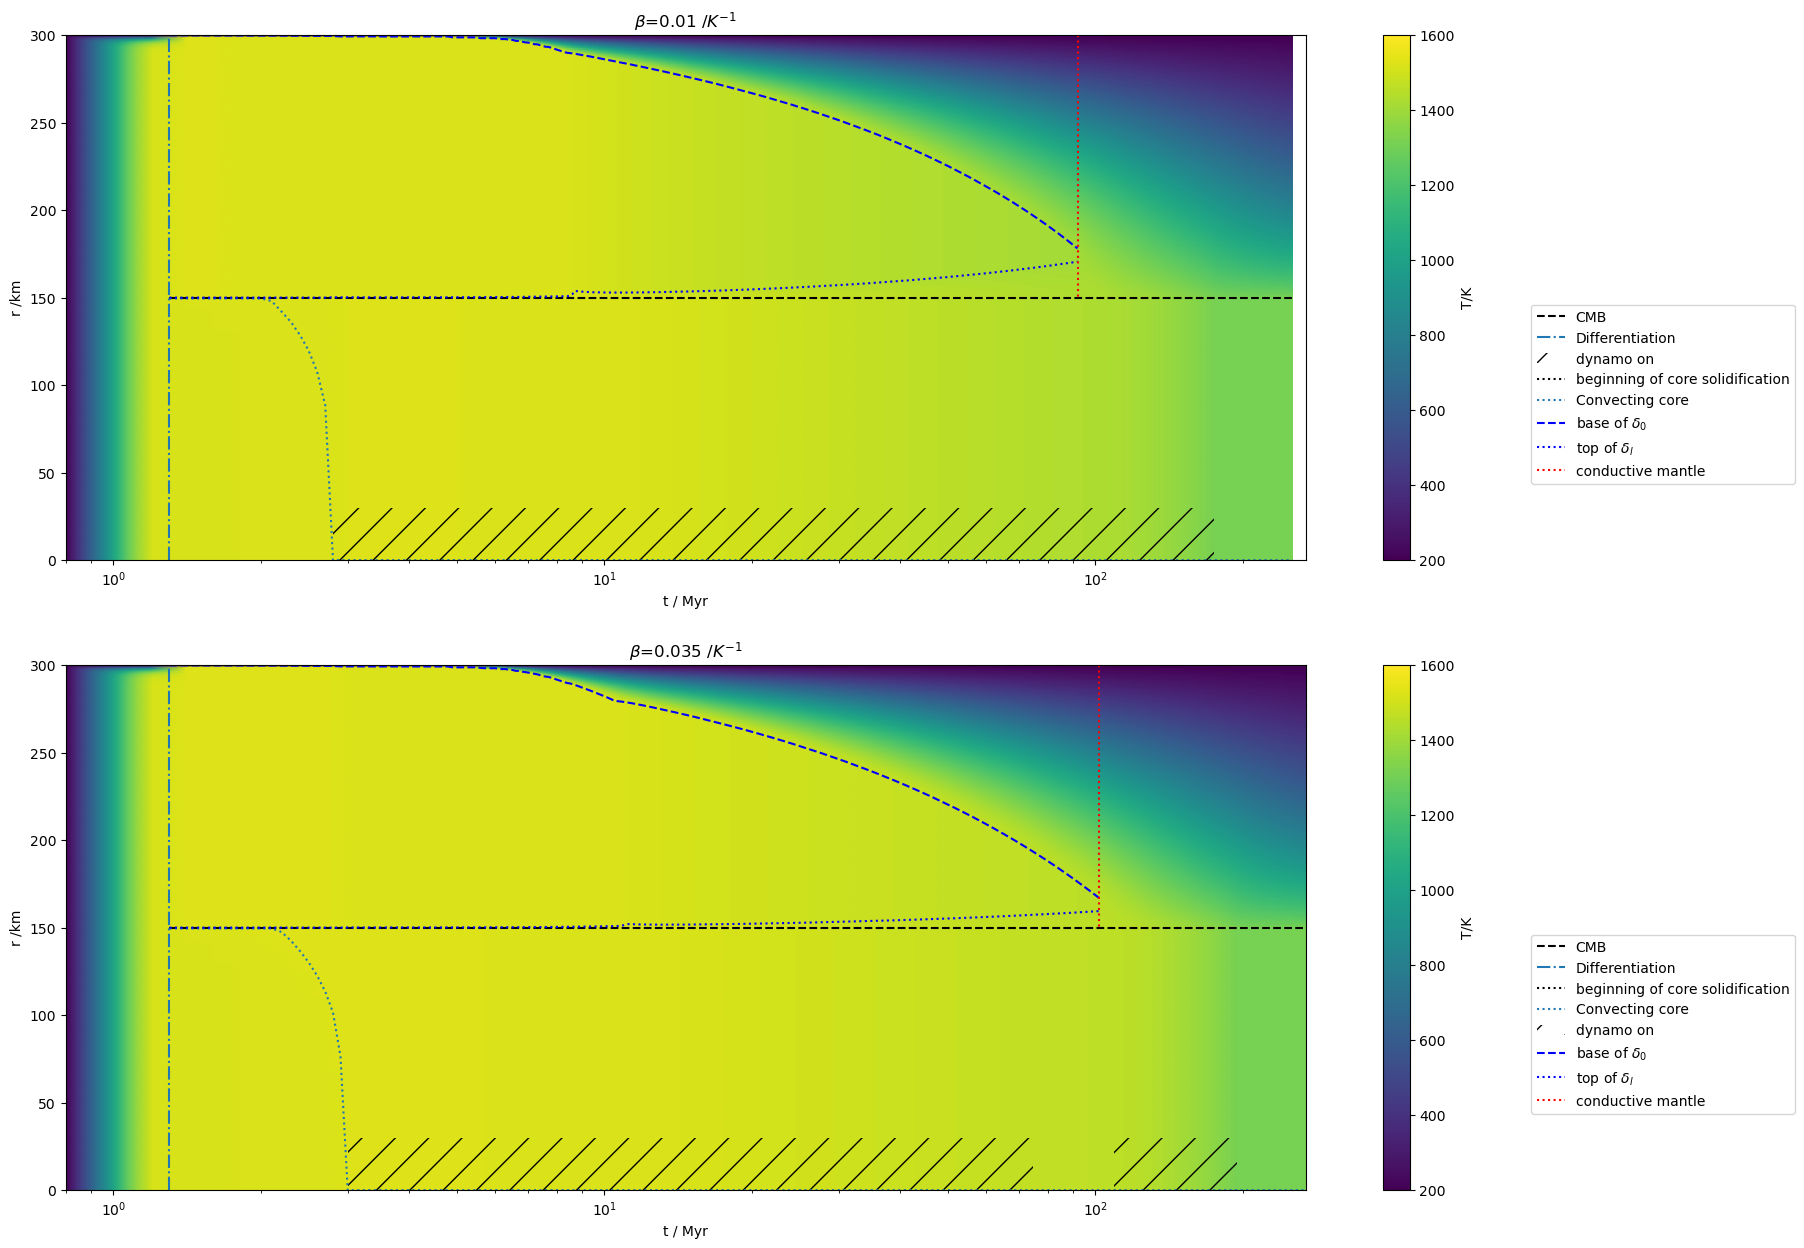

In [37]:
plt.figure(figsize=[20,15])
#subplot 1 - min value
plt.subplot(2,1,1)
plt.pcolormesh(tall_1[::2],rplot_1[::2],Tall_1[::2,::2],shading = 'gouraud',vmin=200,vmax=1600)
plt.hlines(rc1/1e3,min(t1),max(tall_1),linestyle='--',color='black',label='CMB')
plt.vlines(t1[0],0,r1/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc1/5e3],on11,off11,alpha=0,hatch='/',label='dynamo on')
plt.vlines(t1[f1<0.999000][0]/Myr,0/1e3,rc1/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
plt.plot(t1,r_unstable1,linestyle='dotted',label='Convecting core')
if on12>0:
    plt.fill_betweenx([0,rc1/5e3],on12,off12,alpha=0,hatch='/')
if on13>0:
    plt.fill_betweenx([0,rc1/5e3],on13,off13,alpha=0,hatch='/')
if np.any(t1/Myr<fcond_t1):
    plt.plot(t1[(t1<=fcond_t1)&(d01<(r1-rc1))],(r1-d01[(t1<=fcond_t1)&(d01<(r1-rc1))])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t1[(t1<=fcond_t1)&((rc1+dl1)<r1)],(rc1+dl1[(t1<=fcond_t1)&((rc1+dl1)<r1)])/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
    plt.vlines(t1[t1<=fcond_t1][-1],r1/1e3,rc1/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t1,(r1-d01)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t1,(rc1+dl1)/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,tend])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var1} {unit}")
plt.xscale('log')
plt.legend(bbox_to_anchor=[1.4,0.5])

#subplot 2 - max value
plt.subplot(2,1,2)
plt.pcolormesh(tall_2[::2],rplot_2[::2],Tall_2[::2,::2],shading = 'gouraud',vmin=200,vmax=1600)
plt.hlines(rc2/1e3,min(t2),max(tall_2),linestyle='--',color='black',label='CMB')
plt.vlines(t2[0],0,r2/1e3,linestyle='-.',label='Differentiation')
plt.vlines(t2[f2<0.999000][0]/Myr,0/1e3,rc2/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
plt.plot(t2,r_unstable2,linestyle='dotted',label='Convecting core')
plt.fill_betweenx([0,rc2/5e3],on21,off21,alpha=0,hatch='/',label='dynamo on')
if on22>0:
    plt.fill_betweenx([0,rc2/5e3],on22,off22,alpha=0,hatch='/')
if on23>0:
    plt.fill_betweenx([0,rc2/5e3],on23,off23,alpha=0,hatch='/')
if np.any(t2/Myr<fcond_t2):
    plt.plot(t2[(t2<=fcond_t2)&(d02<(r2-rc2))],(r2-d02[(t2<=fcond_t2)&(d02<(r2-rc2))])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t2[(t2<=fcond_t2)&((rc2+dl2)<r2)],(rc2+dl2[(t2<=fcond_t2)&((rc2+dl2)<r2)])/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
    plt.vlines(t2[t2<=fcond_t2][-1],r2/1e3,rc2/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t2,(r2-d02)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t2,(rc2+dl2)/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,tend])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var2} {unit}")
plt.xscale('log')
plt.legend(bbox_to_anchor=[1.4,0.5])
if save == True:
    plt.savefig(f'../Plots/{folder}/Tprofile_{var}.png',bbox_inches='tight')

Just the second variable

### Peak core and mantle temperature <a class="anchor" id="peakT"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [59]:
#find upper and lower bounds for time colour maps
combt = np.concatenate([data['tmax'],data['tcoremax']])
tmin = min(combt)
tmax = max(combt)

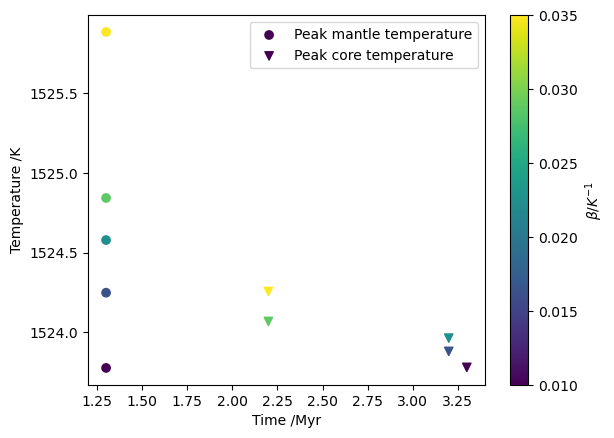

In [60]:
plt.figure()
plt.scatter(data['tmax'],data['peakT'],label='Peak mantle temperature',marker='o',c=data[var])
plt.scatter(data['tcoremax'],data['peak_coreT'],label='Peak core temperature',marker='v',c=data[var])
plt.xlabel('Time /Myr')
plt.legend()
plt.ylabel('Temperature /K')
plt.colorbar(label=f'{varlab}{unit}')

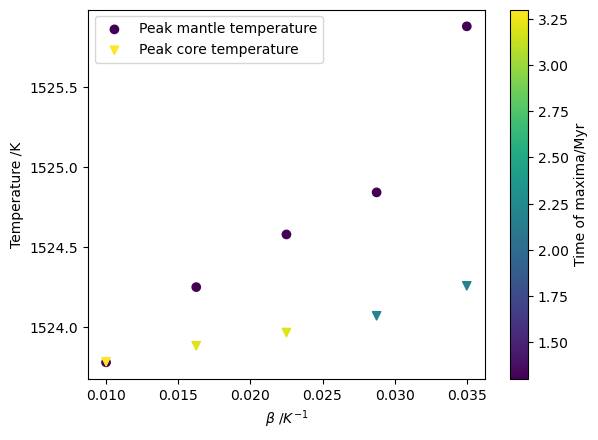

In [61]:
plt.figure()
plt.scatter(data[var],data['peakT'],label='Peak mantle temperature',marker='o',c=data['tmax'],vmin=tmin,vmax=tmax)
plt.scatter(data[var],data['peak_coreT'],label='Peak core temperature',marker='v',c=data['tcoremax'],vmin=tmin,vmax=tmax)
plt.xlabel(f'{varlab} {unit}')
plt.legend()
plt.ylabel('Temperature /K')
plt.colorbar(label='Time of maxima/Myr')
if logvar == True:
    plt.xscale('log')
if save == True:
    plt.savefig(f'../Plots/{folder}/peakT_{var}.png')

Difference in peak temperatures

In [16]:
data['peak_coreT']-data['peakT']

0    0.003505
1   -0.367536
2   -0.614248
3   -0.773084
4   -1.625382
dtype: float64

Difference in timing of peak temperatures

In [17]:
data['tcoremax']-data['tmax']

0    1.999811
1    1.899820
2    1.899820
3    0.899915
4    0.899915
dtype: float64

## Cooling rates <a class="anchor" id="cool"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Calculate max core and mantle cooling rates

In [135]:
dTdt = np.diff(T_profile,axis=1)/(0.1*Myr) #Ks^-1
dTdt = dTdt*Myr #K Myr^-1

In [136]:
#find max cooling rate for each cell
dTdt_max = np.min(dTdt,axis=0) #because cooling use np.min

In [148]:
#find cooling rate for mid mantle and mid core
dTdt_max_man = dTdt_max[int(len(dTdt_max)*0.75)]
#dTdt_max_man = np.min(dTdt_max[int(len(dTdt_max)*0.5):])
print(f'The max mantle cooling rate is {dTdt_max_man:.2g}K/Myr')

The max mantle cooling rate is -47K/Myr


(150.0, 300.0)

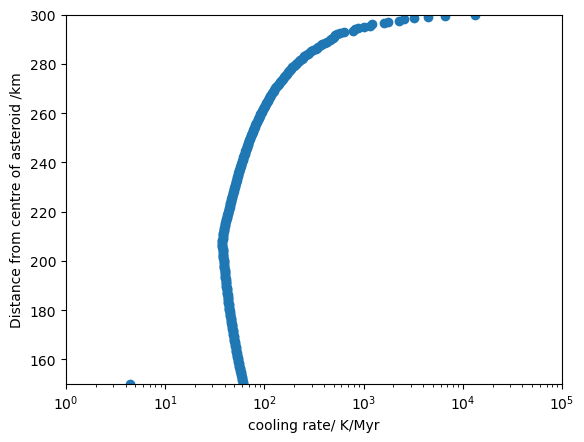

In [151]:
plt.figure()
plt.scatter(-dTdt_max,rplot_1[1:])
plt.xscale('log')
plt.xlabel('cooling rate/ K/Myr')
plt.ylabel('Distance from centre of asteroid /km')
plt.xlim([1,1e5])
plt.ylim([max(rplot_1)/2,max(rplot_1)])

### Max cooling rate for all runs

In [161]:
depth = [0.6,0.75,0.9] #fractional distance through the body
cool = np.zeros([nrun,len(depth)])
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    T_profile = npzfile['T_profile']
    dTdt = np.diff(T_profile,axis=1)/(0.1*Myr) #Ks^-1
    dTdt = dTdt*Myr #K Myr^-1
    #find max cooling rate for each cell
    dTdt_max = np.min(dTdt,axis=0) #because cooling use np.min
    #find cooling rate for mid mantle
    for j, frac in enumerate(depth):
        cool[i,j] = dTdt_max[int(len(dTdt_max)*frac)]

Normalise to cooling rate at minimum value of a parameter

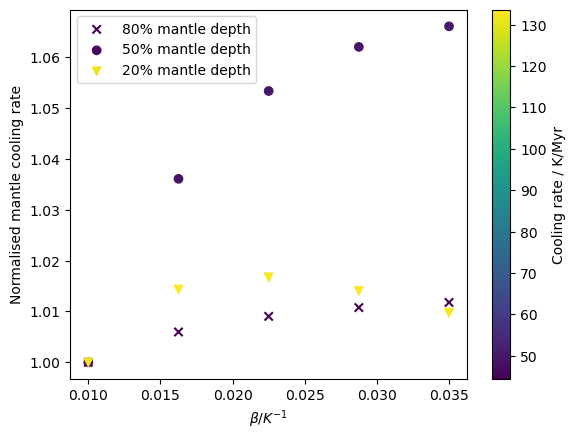

In [192]:
marker = ['x','o','v']
plt.figure()
for j, frac in enumerate(depth):
    plt.scatter(data[var],cool[:,j]/cool[0,j],c=-cool[:,j],label=f'{2*(1-frac)*100:.0f}% mantle depth',marker=marker[j],vmin=np.min(-cool),vmax=np.max(-cool),cmap='viridis')
plt.ylabel('Normalised mantle cooling rate')
plt.xlabel(f'{varlab}/{unit}')
plt.legend()
plt.colorbar(label='Cooling rate / K/Myr')
if save == True:
        plt.savefig(f'../Plots/{folder}cool_rate{var}.png',dpi=450)

# Flux-time <a class="anchor" id="Ft"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Two endmembers

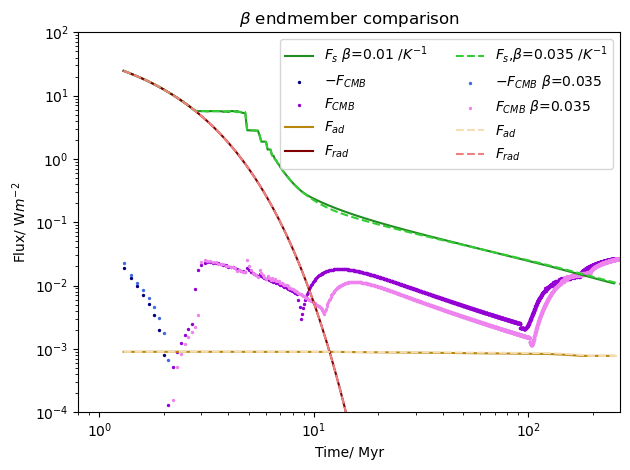

In [63]:
plt.figure(tight_layout=True)
#end member 1
plt.plot(t1,Fs1,label=f'$F_s$ {varlab}={var1} {unit}',color='forestgreen')
plt.scatter(t1[Fcmb1<0],abs(Fcmb1[Fcmb1<0]),label='$-F_{CMB}$',color='navy',s=2)
plt.scatter(t1[Fcmb1>0],Fcmb1[Fcmb1>0],label='$F_{CMB}$',color='darkviolet',s=2)
plt.plot(t1,Fad1,label='$F_{ad}$',color='darkgoldenrod')
plt.plot(t1,Frad1,label='$F_{rad}$',color='maroon')

#end member 2
plt.plot(t2,Fs2,label=f"$F_s$,{varlab}={var2} {unit}",linestyle='dashed',color='limegreen')
plt.scatter(t2[Fcmb2<0],abs(Fcmb2[Fcmb2<0]),label=f'$-F_{{CMB}}$ {varlab}={var2}',color='royalblue',s=2)
plt.scatter(t2[Fcmb2>0],Fcmb2[Fcmb2>0],label=f'$F_{{CMB}}$ {varlab}={var2}',color='violet',s=2)
plt.plot(t2,Fad2,linestyle='dashed',color='wheat',label='$F_{ad}$')
plt.plot(t2,Frad2,linestyle='dashed',color='lightcoral',label='$F_{rad}$')
plt.xlabel('Time/ Myr')
plt.xlim([0.8,tend])
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)
plt.title(f'{varlab} endmember comparison')
if save == True:
    plt.savefig(f'../Plots/{folder}Tflux_endcomp{var}.png',dpi=450)


# Rem and core size <a class="anchor" id="Rt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### B, Rem and compositional/thermal buoyancy flux <a class="anchor" id="BRem-p"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

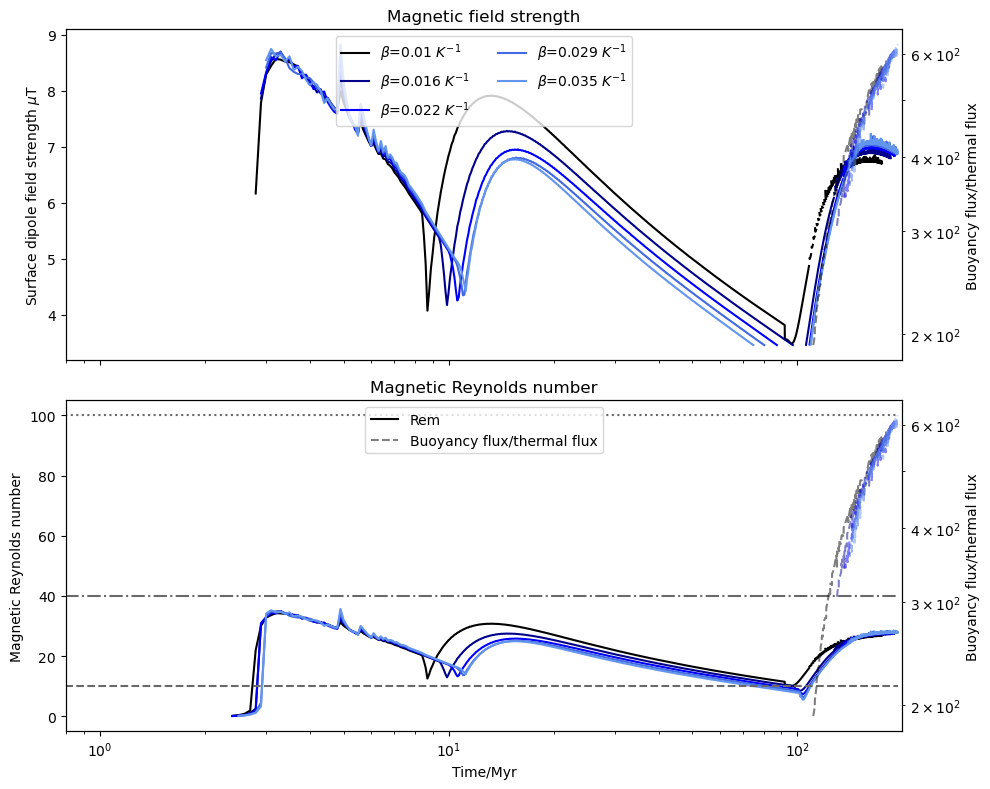

In [68]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    B = npzfile['B']/1e-6
    Rem = npzfile['Rem']
    buoy = npzfile['buoyr'] #ratio of compositional/thermal flux
    threshold=10
    size=2.5 #size of points on scatter plot
    
    #B plot
    
    ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.2g} {unit}')
    ax2.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],alpha=0.5,linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ln1 = ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i],label='Rem')
        ln2 = ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5, label='Buoyancy/thermal flux')
    else:
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i])
        ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5)
    
ax[1].hlines(10,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')
ax2.set_ylabel('Buoyancy flux/thermal flux')
ax3.set_ylabel('Buoyancy flux/thermal flux')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper center')
ax[1].legend(ln1+ln2,['Rem','Buoyancy flux/thermal flux'],loc='upper center')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax[0].set_title('Magnetic field strength')
ax[1].set_title('Magnetic Reynolds number')
ax[1].set_xlim(left=0.8)

if save==True:
    plt.savefig(f'../Plots/{folder}BRem_buoy_{var}.png',dpi=450,bbox_inches='tight')

### B and Rem with onset of solidification <a class="anchor" id="BRem-solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

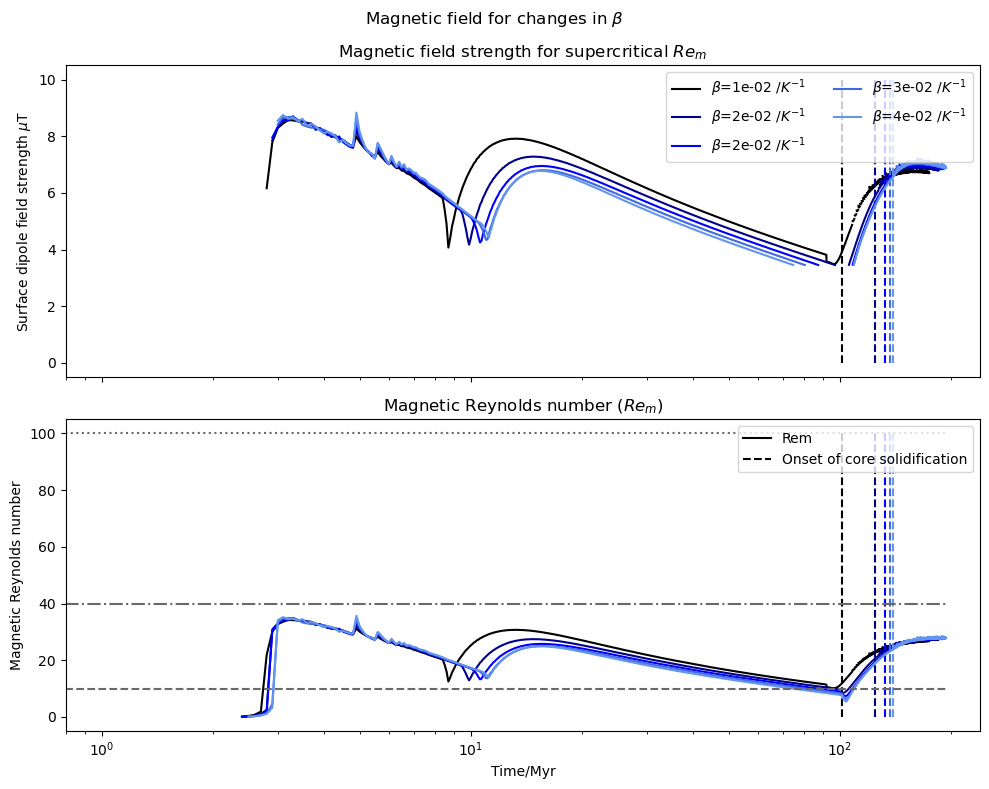

In [65]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
fig.suptitle(f'Magnetic field for changes in {varlab}')

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    tsolid = var_results.loc[var_results['run']==run,'tsolid_start'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    B = npzfile['B']/1e-6
    Rem = npzfile['Rem']
    buoy = npzfile['buoyr'] #ratio of compositional/thermal flux
    threshold=10
    
    #B plot - adjust units labels here
    ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.0e} {unit}')
    ax[0].vlines(tsolid,0,10,color=colors[i],linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i],label='Rem')
        ax[1].vlines(tsolid,0,100,color=colors[i],linestyle='dashed',label='Onset of core solidification')
    else:
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i])
        ax[1].vlines(tsolid,0,100,color=colors[i],linestyle='dashed')
    
ax[1].hlines(10,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper right')
ax[1].legend(loc='upper right')
ax[0].set_title('Magnetic field strength for supercritical $Re_m$')
ax[1].set_title('Magnetic Reynolds number ($Re_m$)')
ax[1].set_xscale('log')
ax[1].set_xlim(left=0.8)
if save == True:
    plt.savefig(f'../Plots/{folder}BRem_onset_{var}.png',dpi=450,bbox_inches='tight')

### Inner core size <a class="anchor" id="f"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

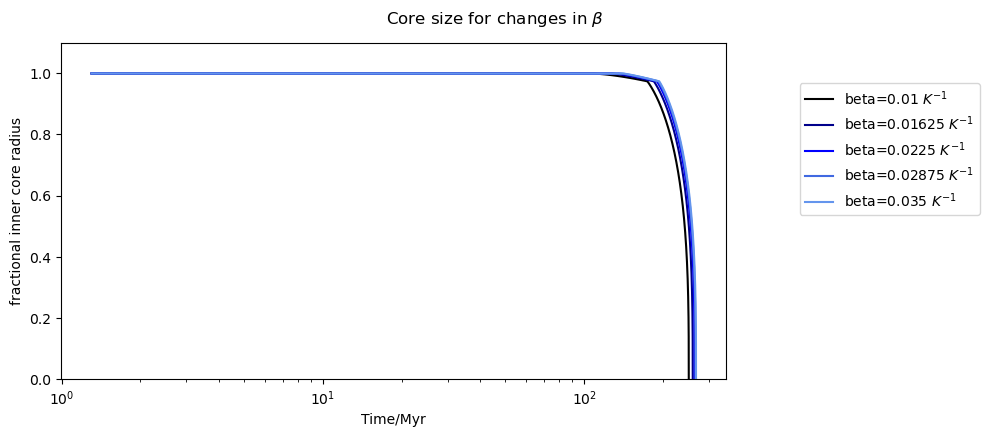

In [69]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Core size for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    f = npzfile['f']
    plt.plot(t,f,label=f'{var}={varval} {unit}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('fractional inner core radius')
plt.legend(bbox_to_anchor=[1.1,0.9])
plt.xscale('log')
plt.ylim([0,1.1])
if save == True:
    plt.savefig(f'../Plots/{folder}f_{var}.png',dpi=450,bbox_inches='tight')

# Timings 

### Filled <a class="anchor" id="time-filled"></a>
<p align="right">(<a href="#top">back to top</a>)</p>


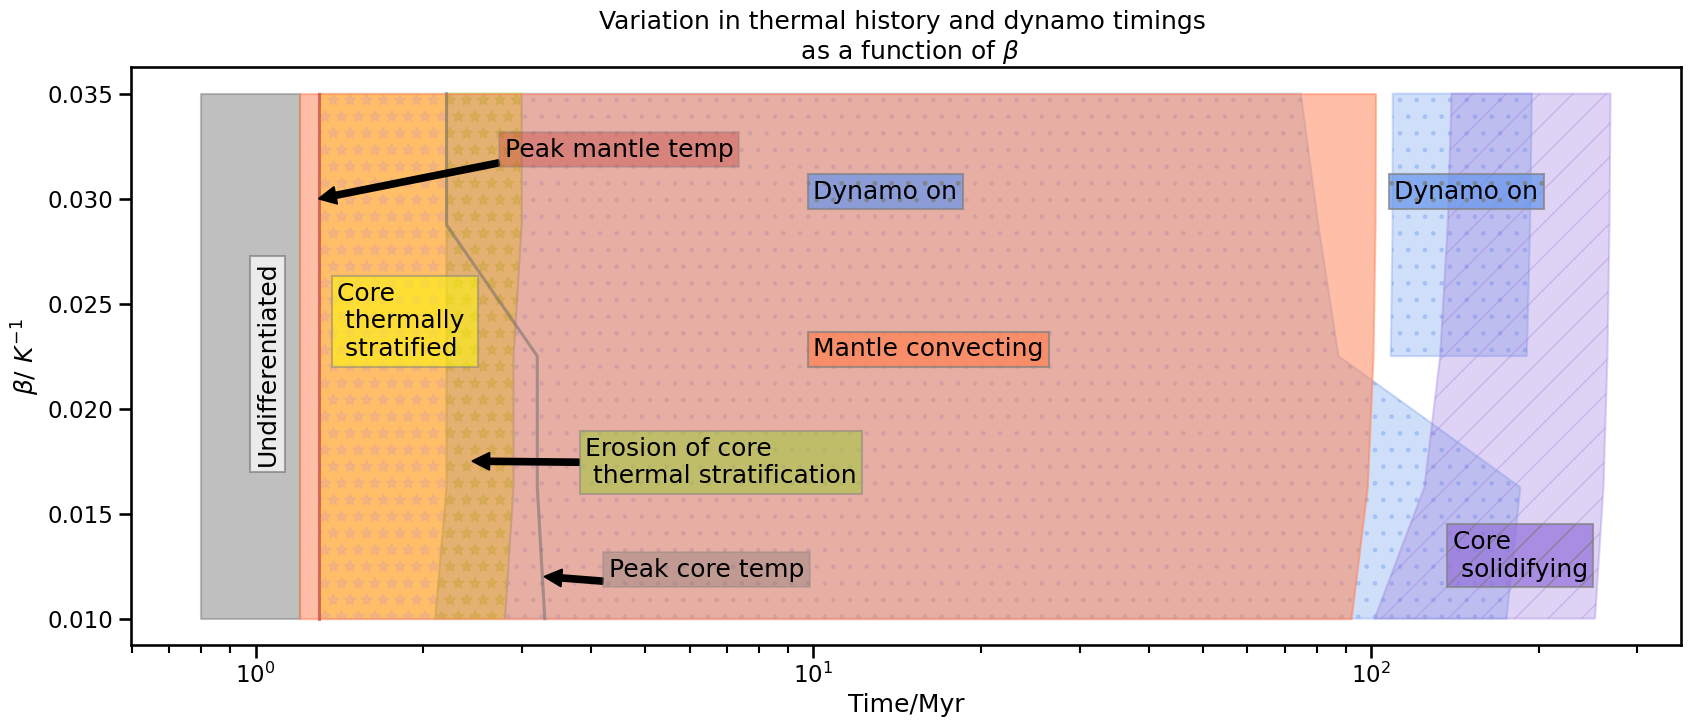

In [70]:
data['fcond_t']=data['fcond_t'].fillna(data['tsolid']) #if mantle doesnt stop convecting fill until end of thermal evolution
data1 = data[data['Bn1']>1] #filter by number of generation periods

with sns.plotting_context('talk'):
    plt.figure(figsize=[20,7.5])
    plt.title(f'Variation in thermal history and dynamo timings \n as a function of {varlab}')
    plt.plot(data['tmax'],data[var],label='peak mantle temp',color='firebrick',alpha=0.5)
    plt.plot(data['tcoremax'],data[var],label='peak core temp',color='dimgray',alpha=0.5)
    #plt.scatter(data['magon_1'],data[var],label='dynamo start',marker='<',color='darkblue')
    #plt.scatter(data['magoff_1'],data[var],label='dynamo end',marker='>',color='darkblue')
    #plt.scatter(data['magon_2'],data[var],marker='<',color='darkblue')
    #plt.scatter(data['magoff_2'],data[var],marker='>',color='darkblue')
    #plt.scatter(data['tsolid'],data[var],label='core solidified',marker='x',color='black')
    plt.fill_betweenx(data[var],0.8,data['diff_time'],color='gray',alpha=0.5)
    plt.fill_betweenx(data[var],data['tstrat_start'],data['tstrat_remove'],color='yellow',alpha=0.5,hatch='*',edgecolor='lightgrey')
    plt.fill_betweenx(data[var],data['tstrat_remove'],data['terode'],color='yellowgreen',alpha=0.5,hatch='*')
    plt.fill_betweenx(data[var],data['magon_1'],data['magoff_1'],color='cornflowerblue',alpha=0.3,hatch='.')
    plt.fill_betweenx(data1[var],data1['magon_2'],data1['magoff_2'],color='cornflowerblue',alpha=0.3,hatch='.')
    plt.fill_betweenx(data[var],data['diff_time'],data['fcond_t'],color='coral',alpha=0.5)
    plt.fill_betweenx(data[var],data['tsolid_start'],data['tsolid'],color='mediumpurple',alpha=0.3,hatch='/')

    plt.xlabel('Time/Myr')
    plt.xscale('log')
    bcol = 'white' #color for label box
    ecol ='gray' #edgecolor for label box
    aval=0.7 #alpha for label box
    
    plt.text(x=1,y=max(data[var]/2),s='Undifferentiated',rotation='vertical',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
    plt.text(x=1.4,y=0.0225,s='Core \n thermally \n stratified',bbox=dict(edgecolor=ecol,facecolor='yellow',alpha=0.5))
    plt.text(x=10,y=0.0225,s='Mantle convecting',bbox=dict(edgecolor=ecol,facecolor='coral',alpha=aval))
    plt.text(x=10,y=0.03,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor='cornflowerblue',alpha=aval,hatch='.'))
    plt.text(x=110,y=0.03,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor='cornflowerblue',alpha=aval,hatch='.'))
    plt.text(x=140,y=min(data[var])*1.2,s='Core \n solidifying',bbox=dict(edgecolor=ecol,facecolor='mediumpurple',alpha=aval,hatch='/'))
    plt.annotate('Erosion of core \n thermal stratification',(data.loc[2,'tstrat_remove']+0.25,max(data[var])*0.5),(data.loc[2,'terode']+1,max(data[var])*0.47),arrowprops=dict(facecolor='black',edgecolor='black'),bbox=dict(edgecolor=ecol,facecolor='yellowgreen',alpha=0.5))
    plt.annotate('Peak mantle temp',(data.loc[2,'tmax'],0.03),(data.loc[2,'tmax']+1.5,0.032),arrowprops=dict(facecolor='black',edgecolor='black'),bbox=dict(edgecolor=ecol,facecolor='firebrick',alpha=0.3))
    plt.annotate('Peak core temp',(data.loc[0,'tcoremax'],0.012),(data.loc[0,'tcoremax']+1,0.012),arrowprops=dict(facecolor='black',edgecolor='black'),bbox=dict(edgecolor=ecol,facecolor='dimgrey',alpha=0.3))
    plt.ylabel(f'{varlab}/ {unit}')
    #plt.legend(bbox_to_anchor=[0.6,0.2])
    
if save == True:
    plt.savefig(f'../Plots/{folder}all_timings_{var}.png',dpi=450,bbox_inches='tight') 

### Dynamo generation time <a class="anchor" id="dynamo"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

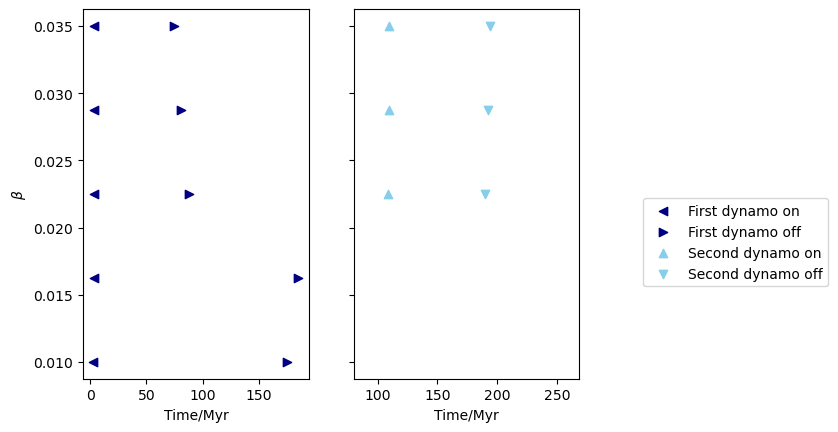

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)
ax[0].scatter(data['magon_1'],data[var],label='First dynamo on',marker='<',color='navy')
ax[0].scatter(data['magoff_1'],data[var],label='First dynamo off',marker='>',color='navy')
ax[1].scatter(data['magon_2'],data[var],label='Second dynamo on',marker='^',color='skyblue')
ax[1].scatter(data['magoff_2'],data[var],label='Second dynamo off',marker='v',color='skyblue')

ax[0].set_ylabel(varlab)
ax[0].set_xlabel('Time/Myr')
ax[1].set_xlabel('Time/Myr')
ax[1].set_xlim([80,tend])
fig.legend(bbox_to_anchor=[1.3,0.5])

if save == True:
    plt.savefig(f'../Plots/{folder}/dynamot_{var}.png',bbox_inches='tight')

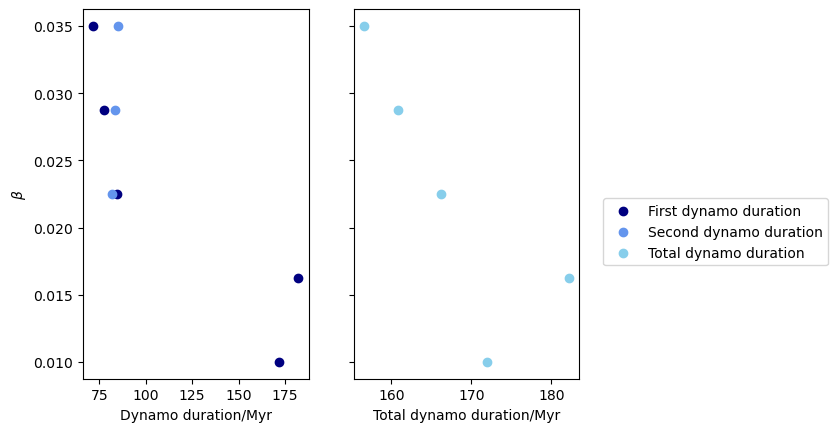

In [24]:
dur1 = data['magoff_1']-data['magon_1']
dur2 = data['magoff_2']-data['magon_2']
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)
ax[0].scatter(dur1,data[var],label='First dynamo duration',color='navy')
ax[0].scatter(dur2[dur2>0],data[var][dur2>0],label='Second dynamo duration',color='cornflowerblue')

ax[1].scatter(dur1+dur2,data[var],label='Total dynamo duration',color='skyblue')


ax[0].set_ylabel(varlab)
ax[0].set_xlabel('Dynamo duration/Myr')
ax[1].set_xlabel('Total dynamo duration/Myr')
fig.legend(bbox_to_anchor=[1.3,0.5])

if save == True:
    plt.savefig(f'../Plots/{folder}/dynamodur_{var}.png',bbox_inches='tight')

Duration bar chart

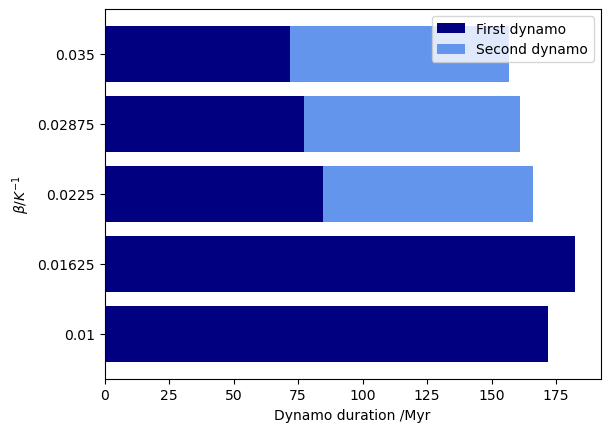

In [25]:
plt.figure()
plt.barh(data[var],dur1,height=0.005,label='First dynamo',color='navy')
plt.barh(data[var],dur2,height=0.005,left=dur1,label='Second dynamo',color='cornflowerblue')
plt.legend()
plt.xlabel('Dynamo duration /Myr')
plt.ylabel(f'{varlab}{unit}')
plt.yticks(data[var],data[var])
plt.xlim([0,max(dur1+dur2)+10])
if save == True:
    plt.savefig(f'../Plots/{folder}/dynamobarh_{var}.png',bbox_inches='tight')

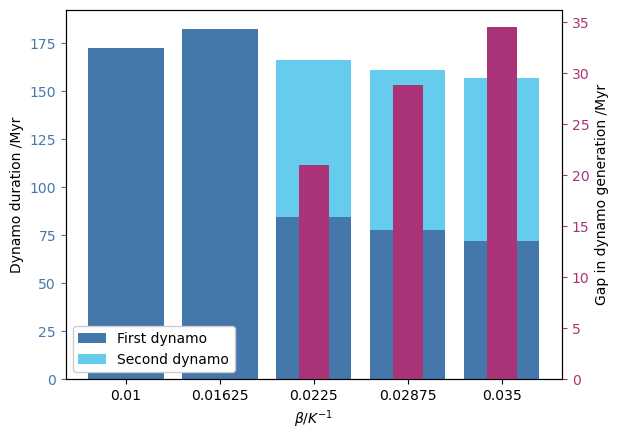

In [57]:
dur1 = data['magoff_1']-data['magon_1']
dur2 = data['magoff_2']-data['magon_2']
gap = data['magon_2']-data['magoff_1']
fig = plt.figure()
ax = plt.axes()
ax2 = ax.twinx()
ax.bar(data[var],dur1,width=0.005,label='First dynamo',color='#4477AA')
ax.bar(data[var],dur2,bottom=dur1,width=0.005,label='Second dynamo',color='#66CCEE')
ax2.bar(data[var][gap>0],gap[gap>0],width=0.002,color='#AA3377')
ax.legend(loc='lower left',framealpha=1)
ax.set_ylim([0,max(dur1+dur2)+10])
ax.set_ylabel('Dynamo duration /Myr')
ax2.set_ylabel('Gap in dynamo generation /Myr')
ax.tick_params(axis='y',colors='#4477AA')
ax2.tick_params(axis='y',colors='#AA3377')
ax.set_xlabel(f'{varlab}{unit}')
ax.set_xticks(data[var],data[var])
if save == True:
    plt.savefig(f'../Plots/{folder}/dynamobar_{var}.png',bbox_inches='tight')

### Peak field strength

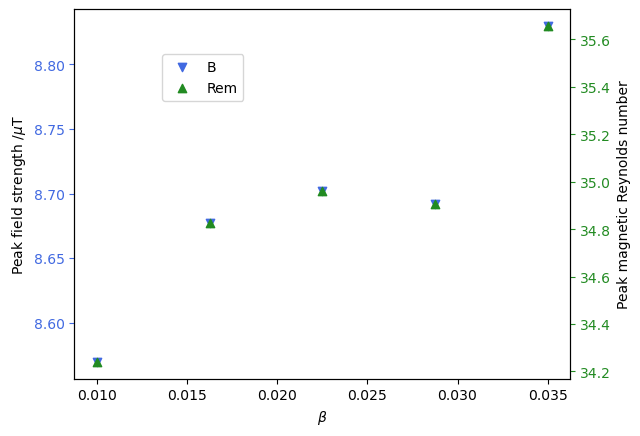

In [27]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,sharex=True)
ax2 = ax1.twinx()
#plot unchanged B
bcol = 'royalblue'
rcol = 'forestgreen'
ln1 = ax1.scatter(data[var],data['max_B']/1e-6,label='B',marker='v',color=bcol)
ln2 = ax2.scatter(data[var],data['max_R'],label='Rem',marker='^',color=rcol)
ax1.set_xlabel(varlab)
#ax1.legend(loc='upper left')
fig.legend(['B','Rem'],bbox_to_anchor=[0.4,0.8])
ax1.set_ylabel('Peak field strength /$\mu$T')
ax2.set_ylabel('Peak magnetic Reynolds number')
#changing colours
ax1.tick_params(axis='y',colors=bcol)
ax2.tick_params(axis='y',colors=rcol)
#ax1.yaxis.label.set_color(bcol) 
#ax2.yaxis.label.set_color(rcol) 
#ax2.spines['left'].set_color(bcol) #ax2 plots over ax1 so change colour of both
#ax2.spines['right'].set_color(rcol)
#if save == True:
    #plt.savefig(f'../Plots/{folder}/peakB_all_{var}.png',bbox_inches='tight')
plt.savefig(f'../Plots/{folder}/test6.png',bbox_inches='tight')

### Solidification time <a class="anchor" id="solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

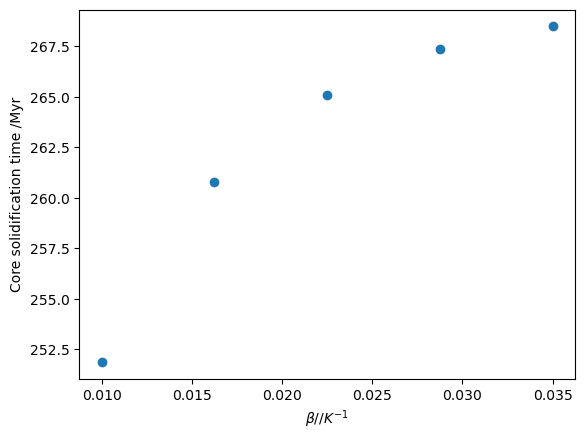

In [28]:
fig = plt.figure()
plt.scatter(data[var],data['tsolid'],label='Peak mantle temperature',marker='o')
plt.xlabel(f'{varlab}/{unit}')
plt.ylabel('Core solidification time /Myr')

if save == True:
    plt.savefig(f'../Plots/{folder}/solidt_{var}.png',bbox_inches='tight') 

## Stagnant lid thickness <a class="anchor" id="lid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

(0.0, 1.0)

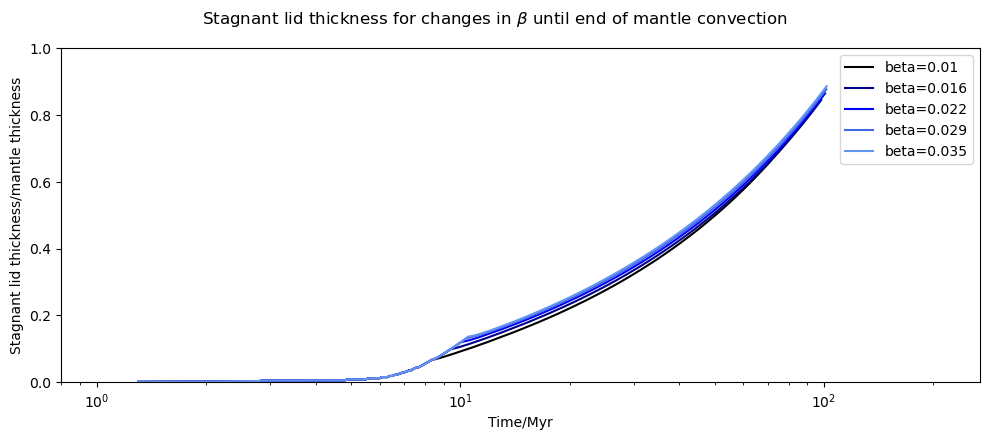

In [29]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Stagnant lid thickness for changes in {varlab} until end of mantle convection')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    rmantle = var_data.loc[var_data['run']==run,'r'].values[0]/2
    fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    d0 = npzfile['d0']
    if fcond_t > 0:
        plt.plot(t[t<=fcond_t],d0[t<=fcond_t]/rmantle,label=f'{var}={varval:.2g}',color=colors[i])
    else:
        plt.plot(t,d0/rmantle,label=f'{var}={varval:.2g}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('Stagnant lid thickness/mantle thickness')
plt.legend()
plt.xscale('log')
plt.xlim([0.8,tend])
plt.ylim([0,1])
#if save == True:
 #   plt.savefig(f'../Plots/{folder}d0_{var}.png',dpi=450,bbox_inches='tight')